### Inspect current "default" MiMA runs
Goals of this notebook:
* Check the QBO Period + Amplitude consistent with that expected from emulator run
* Check the QBO Period/Ampltiude Covariance


In [11]:
import numpy as np
import xarray as xr
import sys
import os 
import matplotlib.pyplot as plt
sys.path.append("../") # this is janky af - TODO find a better way to do this in Jupyter
import mima_get_period
ds = xr.open_dataset("../data/reference_qbo_20_40.nc")
u = ds.ucomp.sel(pfull=10,method='nearest')
t = np.arange(len(u))
smoothed = mima_get_period.rolling_average(u,mima_get_period.FIVE_MONTHS)

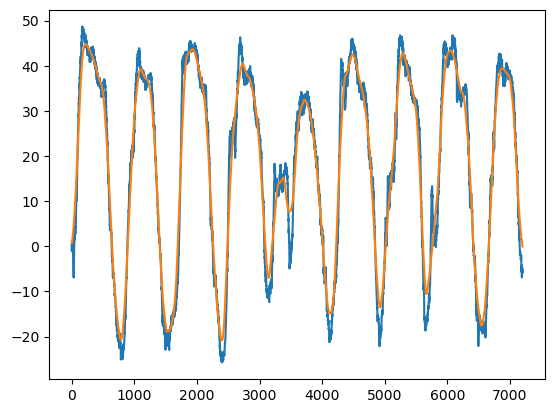

In [12]:
fig,ax = plt.subplots()
ax.plot(u,label="Raw")
ax.plot(smoothed,label="5 month rolling average")

In [18]:
mean,std,n,roots = mima_get_period.get_qbo_period_transitions(smoothed,np.arange(len(smoothed)))
mean,std
periods = roots[2::2] - roots[:-2:2]

In [22]:
transition_index = np.round(roots).astype(int)
amplitudes = []
for (start,stop) in zip(transition_index[::2],transition_index[2::2]):
    max = np.max(smoothed[start:stop])
    min = np.min(smoothed[start:stop])
    amplitudes.append((max-min)/2)

In [21]:
periods

array([762.06241399, 854.1571857 , 832.19869521, 918.26137637,
       833.15669848, 765.87572904, 806.16937547, 782.2718825 ])

In [25]:
np.cov(np.vstack([amplitudes,periods/30]))

array([[13.08075254, -3.72694705],
       [-3.72694705,  3.02230841]])

In [26]:
amplitudes

[29.994530843098957,
 31.299319874445597,
 30.622348718643188,
 19.758033476943773,
 28.725331495602926,
 28.147305769522987,
 26.942931834080568,
 28.479373337427774]